In [25]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-1, 1)

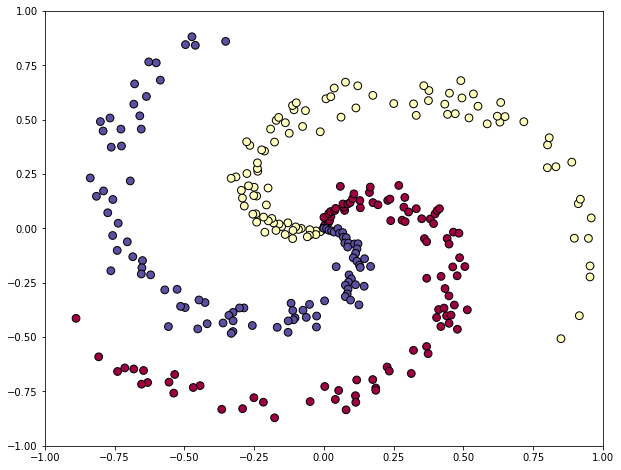

In [38]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolors='black',c=y, s=60, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [67]:
#Training the dataset Linear classification

#initialize the weight and bias
W = 0.01*np.random.rand(D,K)
b = np.zeros((1,K))

#hyperparameters 
learning_rate =1e-0
reg = 1e-3

num_example = X.shape[0]
for i in range(200):
    
    #primary evaluation of score [N * K]
    scores = np.dot(X,W) + b 
    
    #computing the probablity 
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
    
    log_probs = -np.log(probs[range(num_example),y])
    data_loss = np.sum(log_probs) / num_example
    reg_loss = 0.5 * reg *np.sum(W*W)
    total_loss = data_loss + reg_loss
    if i%10 == 0:
        print ("iterations {}: loss {}".format(i,total_loss))
    
    #gredients descent
    dscores = probs 
    dscores[range(num_example),y] -= 1
    dscores /=num_example
    
    dW = np.dot(X.T,dscores)
    db = np.sum(dscores,axis=0,keepdims=True)
    
    dW += reg*W
    
    W = W - learning_rate*dW
    b = b - learning_rate*db

iterations 0: loss 1.0990002548366158
iterations 10: loss 0.9179317354863882
iterations 20: loss 0.8517767559163117
iterations 30: loss 0.8224680065109053
iterations 40: loss 0.8076565924343503
iterations 50: loss 0.7994892348498331
iterations 60: loss 0.7947056618046109
iterations 70: loss 0.7917794986678297
iterations 80: loss 0.7899305711006306
iterations 90: loss 0.7887329579103741
iterations 100: loss 0.7879420410897808
iterations 110: loss 0.7874116154261146
iterations 120: loss 0.7870514650549723
iterations 130: loss 0.7868044658578971
iterations 140: loss 0.7866336746836841
iterations 150: loss 0.786514779832702
iterations 160: loss 0.7864315493144455
iterations 170: loss 0.7863730144269822
iterations 180: loss 0.7863316881698389
iterations 190: loss 0.786302416799421


In [68]:
#evaluate training set accuracy 

scores = np.dot(X,W) + b
predicted_class = np.argmax(scores, axis =1)
print("Trainning accuracy : {}" .format((np.mean(predicted_class == y))))

Trainning accuracy : 0.49333333333333335


(-1, 1)

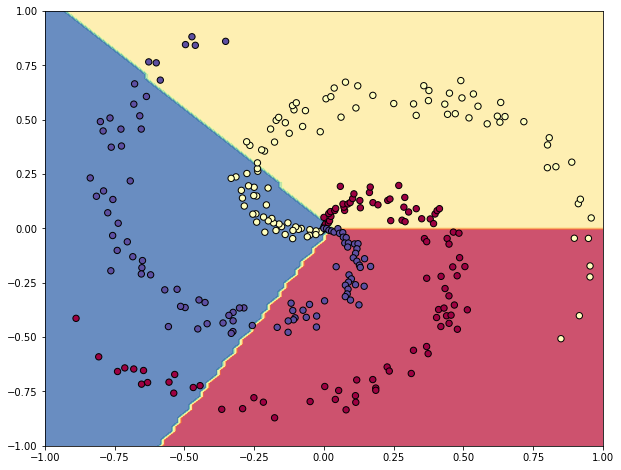

In [71]:
#plot the resulting classification

h = 0.02 
x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = np.dot(np.c_[xx.ravel(),yy.ravel()],W) + b 
Z = np.argmax(Z , axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1],edgecolor='black', c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])


In [78]:
#Training with hidden layer 
h = 100 # size of hidden layer
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
learning_rate = 1e-0
reg = 1e-3

#gradent decent loop
num_example = X.shape[0]
for i in range(20000):
    
    #evaluation using hidden layer
    # this is ReLU activation
    hidden_layer = np.maximum(0, np.dot(X,W1) + b1 )
    scores = np.dot(hidden_layer,W2) + b2
    exp = np.exp(scores)
    probs =  exp / np.sum(exp,axis = 1,keepdims=True)
    
    log_probs = -np.log(probs[range(num_example),y])
    data_loss = np.sum(log_probs) / num_example 
    reg_loss = 0.5*reg*np.sum(W2*W2)
    total_loss = data_loss + reg_loss
    if i %100 == 0:
        print("iterations {} : loss {}".format(i,total_loss))
        
    dscores = probs
    dscores[range(num_example),y] -=1
    dscores /= num_example
    
    #backpropogate the gradient on scores 
    #first backprop into parameter W2 and b2
    dW2 = np.dot(hidden_layer.T,dscores)
    db2 = np.sum(dscores,axis=0,keepdims=True)
    #next backprop in hidden_layer
    dhidden = np.dot(dscores,W2.T)
    #backdrop in ReLU non-linearity
    dhidden[hidden_layer<=0] = 0
    #backdrop in W1 and b1
    dW1 = np.dot(X.T,dhidden)
    db1 = np.sum(dhidden,axis = 0, keepdims=True)
    
    #regularisation gradient     
    dW2 +=reg*W2
    dW1 +=reg*W1
    
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    b1 = b1 - learning_rate*db1

iterations 0 : loss 1.0988720543894532
iterations 100 : loss 0.7194112194843081
iterations 200 : loss 0.7054448320939138
iterations 300 : loss 0.5487811767801748
iterations 400 : loss 0.4076336650742421
iterations 500 : loss 0.35454886229415294
iterations 600 : loss 0.30907082604554736
iterations 700 : loss 0.29911649459769424
iterations 800 : loss 0.2766261766231724
iterations 900 : loss 0.25814472828395496
iterations 1000 : loss 0.24020932634960218
iterations 1100 : loss 0.22573121680678554
iterations 1200 : loss 0.21327156936412375
iterations 1300 : loss 0.20586542178956918
iterations 1400 : loss 0.20039621696249407
iterations 1500 : loss 0.19676635933521874
iterations 1600 : loss 0.19385272132682285
iterations 1700 : loss 0.19115078437459837
iterations 1800 : loss 0.1888304059851279
iterations 1900 : loss 0.18685035628327445
iterations 2000 : loss 0.18525737263075137
iterations 2100 : loss 0.1839648125070101
iterations 2200 : loss 0.1829248087483683
iterations 2300 : loss 0.1820505

iterations 19100 : loss 0.1755868773981757
iterations 19200 : loss 0.17558782956935498
iterations 19300 : loss 0.1755904689215549
iterations 19400 : loss 0.17558473369318117
iterations 19500 : loss 0.17558025463420585
iterations 19600 : loss 0.17557287105737335
iterations 19700 : loss 0.17558037441431212
iterations 19800 : loss 0.175573434450024
iterations 19900 : loss 0.17557479188559985


In [79]:
#evaluating using trainning set accuracy 
hidden_layer = np.maximum(0,np.dot(X,W1) +b1)
scores = np.dot(hidden_layer,W2) + b2
predicted_class = np.argmax(scores,axis=1)
print("Training accuracy : {}".format(np.mean(predicted_class== y)))

Training accuracy : 0.98


(-1.8712034092398278, 1.8687965907601756)

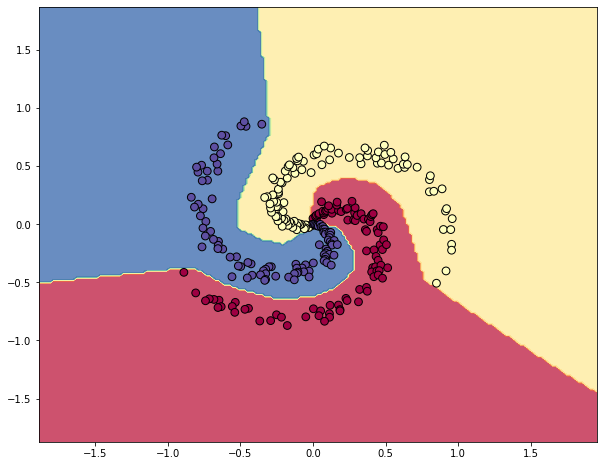

In [84]:
# plot the resultant 
h =0.02
x_min,x_max = X[:,0].min() -1 , X[:,0].max() +1
y_min,y_max = X[:,1].min() -1 , X[:,1].max() +1
xx ,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z,axis =1 )
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1], c = y, s = 60,edgecolor='black',cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
